# Multi-Agent System Demo

This notebook demonstrates how to set up and use a multi-agent system using Google's Agent Development Kit (ADK). The system consists of specialized sub-agents (Billing and Support) coordinated by a main agent.

## Import Required Libraries

In [1]:
from google.adk.agents import LlmAgent
from google.adk.runners import Runner
from google.adk.artifacts import InMemoryArtifactService
from google.adk.memory.in_memory_memory_service import InMemoryMemoryService
from google.adk.sessions import InMemorySessionService
from google.genai import types
import google.generativeai as genai
from google.adk.models.lite_llm import LiteLlm
import os
import logging
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap

## Configure Logging

In [2]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
)
logger = logging.getLogger("<<MultiAgentTest>>")

## Configure API Keys

**Note:** In a production environment, you should use environment variables or a secure configuration method rather than hardcoding API keys.

In [ ]:
genai.configure(api_key="")
os.environ['OPENAI_API_KEY'] = ''
os.environ["GOOGLE_GENAI_USE_VERTEXAI"] = "False"
MODEL_GPT_4O = "gpt-3.5-turbo-0125"

## Define Specialized Sub-Agents

We'll create two specialized agents:
1. Billing Agent - Handles billing and payment-related inquiries
2. Support Agent - Provides technical support and troubleshooting assistance

In [4]:
# Define specialized sub-agents
billing_agent = LlmAgent(
    name="Billing",
    model=LiteLlm(model=MODEL_GPT_4O),
    instruction="You handle billing and payment-related inquiries.",
    description="Handles billing inquiries."
)

support_agent = LlmAgent(
    name="Support",
    model=LiteLlm(model=MODEL_GPT_4O),
    instruction="You provide technical support and troubleshooting assistance.",
    description="Handles technical support requests."
)

## Define the Coordinator Agent

The coordinator agent routes user requests to the appropriate specialized agent.

In [5]:
# Define the coordinator agent
coordinator = LlmAgent(
    name="HelpDeskCoordinator",
    model=LiteLlm(model=MODEL_GPT_4O),
    instruction="Route user requests: Use Billing agent for payment issues, Support agent for technical problems.",
    description="Main help desk router.",
    sub_agents=[billing_agent, support_agent]
)

# For ADK compatibility, the root agent must be named `root_agent`
root_agent = coordinator

## Set Up the Runner

The Runner is responsible for managing the agent execution, sessions, and artifacts.

In [6]:
runner = Runner(
        app_name="test_agent",
        agent=root_agent,
        artifact_service=InMemoryArtifactService(),
        session_service=InMemorySessionService(),
        memory_service=InMemoryMemoryService(),)

## Run a Simulation with a User Query

Let's test our multi-agent system with a sample user query. You can uncomment the query you want to test.

In [7]:
# Simulate a user query
user_query = "I can't log in gmail by chrome, help to give advice to solve this issue."
# user_query = "my billing is not working, help to give advice."
user_id = "test_user"
session_id = "test_session"

# Create a session
session = runner.session_service.create_session(
    app_name="test_agent",
    user_id=user_id,
    state={},
    session_id=session_id,
)

In [8]:
# Create a content object with the user query
content = types.Content(
    role="user", 
    parts=[types.Part.from_text(text=user_query)]
)

# Run the agent with the correct parameters
events = list(runner.run(
    user_id=user_id, 
    session_id=session.id, 
    new_message=content
))

08:41:58 - LiteLLM:INFO: utils.py:2870 - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:41:58,428 - LiteLLM - INFO - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:41:59,189 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:41:59 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
2025-05-14 08:41:59,207 - LiteLLM - INFO - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
08:41:59 - LiteLLM:INFO: utils.py:2870 - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:41:59,214 - LiteLLM - INFO - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
08:41:59 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
2025-05-14 08:41:59,215 - LiteLLM - INFO - selected model name for cost calculation: openai/gpt-

In [9]:
# Process the events to get the response
response = ""
if events and events[-1].content and events[-1].content.parts:
    for event in events:
        logger.info(f"Event: {event.author}, Actions: {event.actions}")
        response = "\n".join([p.text for p in events[-1].content.parts if p.text])

print(response)

2025-05-14 08:42:01,296 - <<MultiAgentTest>> - INFO - Event: HelpDeskCoordinator, Actions: skip_summarization=None state_delta={} artifact_delta={} transfer_to_agent=None escalate=None requested_auth_configs={}
2025-05-14 08:42:01,299 - <<MultiAgentTest>> - INFO - Event: HelpDeskCoordinator, Actions: skip_summarization=None state_delta={} artifact_delta={} transfer_to_agent='Support' escalate=None requested_auth_configs={}
2025-05-14 08:42:01,299 - <<MultiAgentTest>> - INFO - Event: Support, Actions: skip_summarization=None state_delta={} artifact_delta={} transfer_to_agent=None escalate=None requested_auth_configs={}


To troubleshoot the login issue with Gmail on Chrome, here are a few steps you can follow:

1. **Check Internet Connection:** Ensure that your internet connection is stable and working properly.

2. **Clear Cache and Cookies:** Clearing the cache and cookies in Chrome can resolve login issues. Go to Chrome Settings > Privacy and Security > Clear browsing data.

3. **Disable Browser Extensions:** Some browser extensions may interfere with Gmail login. Disable all extensions and try logging in again.

4. **Update Chrome:** Make sure that Google Chrome is up to date. Go to Chrome Settings > About Chrome to check for updates.

5. **Try Incognito Mode:** Open an incognito window (Ctrl+Shift+N) in Chrome and try logging in to Gmail. If it works, there may be an issue with your browser settings.

6. **Reset Chrome Settings:** If none of the above steps work, you can reset Chrome settings to default. Go to Chrome Settings > Advanced > Reset settings.

If the issue persists after trying these s

## Helper Functions for Testing Queries

Let's define some helper functions to test different queries and analyze the agent invoke paths.

In [10]:
# Function to test different queries
def test_query(query):
    # Create a new session for each test
    test_session_id = f"test_session_{hash(query)}"
    session = runner.session_service.create_session(
        app_name="test_agent",
        user_id=user_id,
        state={},
        session_id=test_session_id,
    )
    
    # Create content and run the agent
    content = types.Content(role="user", parts=[types.Part.from_text(text=query)])
    events = list(runner.run(user_id=user_id, session_id=session.id, new_message=content))
    
    # Process and return the response and events
    if events and events[-1].content and events[-1].content.parts:
        for event in events:
            logger.info(f"Event: {event.author}, Actions: {event.actions}")
        response = "\n".join([p.text for p in events[-1].content.parts if p.text])
        return response, events
    return "No response", []

# Helper function to extract agent invoke path from events
def extract_agent_path(events):
    agent_path = []
    for event in events:
        if hasattr(event, 'author') and event.author:
            agent_path.append(event.author)
    return agent_path

# Function to visualize agent invoke path
def visualize_agent_path(query_paths):
    """
    Visualize the agent invoke path for different queries using a directed graph.
    
    Args:
        query_paths: Dictionary mapping query descriptions to agent paths
    """
    plt.figure(figsize=(12, 8))
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Define node positions manually for better layout
    pos = {
        "User": (0, 0),
        "HelpDeskCoordinator": (1, 0),
        "Support": (2, 0.5),
        "Billing": (2, -0.5)
    }
    
    # Define colors for different query types
    colors = {
        "Support Query": "blue",
        "Billing Query": "green"
    }
    
    # Add nodes
    G.add_node("User", desc="User")
    G.add_node("HelpDeskCoordinator", desc="Coordinator")
    G.add_node("Support", desc="Support Agent")
    G.add_node("Billing", desc="Billing Agent")
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightgray")
    
    # Draw node labels
    nx.draw_networkx_labels(G, pos, labels={n: G.nodes[n]['desc'] for n in G.nodes()})
    
    # Add edges for each query path
    edge_colors = []
    edge_labels = {}
    edges = []
    
    for i, (query_desc, path) in enumerate(query_paths.items()):
        # Insert "User" at the beginning of the path
        full_path = ["User"] + path
        
        # Add edges for this path
        for j in range(len(full_path) - 1):
            source = full_path[j]
            target = full_path[j+1]
            edge = (source, target)
            edges.append(edge)
            edge_colors.append(colors[query_desc])
            
            # Add or update edge label
            if edge in edge_labels:
                edge_labels[edge] += f", {query_desc}"
            else:
                edge_labels[edge] = f"{query_desc}"
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Draw edges with colors
    for i, (u, v) in enumerate(edges):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, 
                              edge_color=edge_colors[i], arrows=True, 
                              arrowstyle='->', arrowsize=20)
    
    # Draw edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=query_type)
                      for query_type, color in colors.items()]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.title("Agent Invoke Path for Query", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


## Support Agent Query Example

Let's test a query that should be routed to the Support agent and analyze the agent invoke path.

08:42:01 - LiteLLM:INFO: utils.py:2870 - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:42:01,338 - LiteLLM - INFO - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai


Query: I can't access my email account, it says my password is incorrect, help to give advice


2025-05-14 08:42:01,951 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:42:01 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
2025-05-14 08:42:01,955 - LiteLLM - INFO - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
08:42:01 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
2025-05-14 08:42:01,961 - LiteLLM - INFO - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
08:42:01 - LiteLLM:INFO: utils.py:2870 - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:42:01,963 - LiteLLM - INFO - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:42:03,680 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:42:03 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost cal

Response: I see that you are having trouble accessing your email account because it says your password is incorrect. I can help you with that. 

Please try the following steps to resolve the issue:
1. Double-check that you are entering the correct password. Make sure that the Caps Lock key is off and that you are typing the password correctly.
2. If you have recently changed your password, make sure you are entering the new password and not the old one.
3. Try resetting your password through the account recovery options provided by your email service provider.
4. Clear your browser cache and cookies and try logging in again.
5. If the issue persists, contact your email service provider for further assistance.

If you need any help with the above steps or if you have any other questions, feel free to ask.
Agent Path: ['HelpDeskCoordinator', 'HelpDeskCoordinator', 'Support']


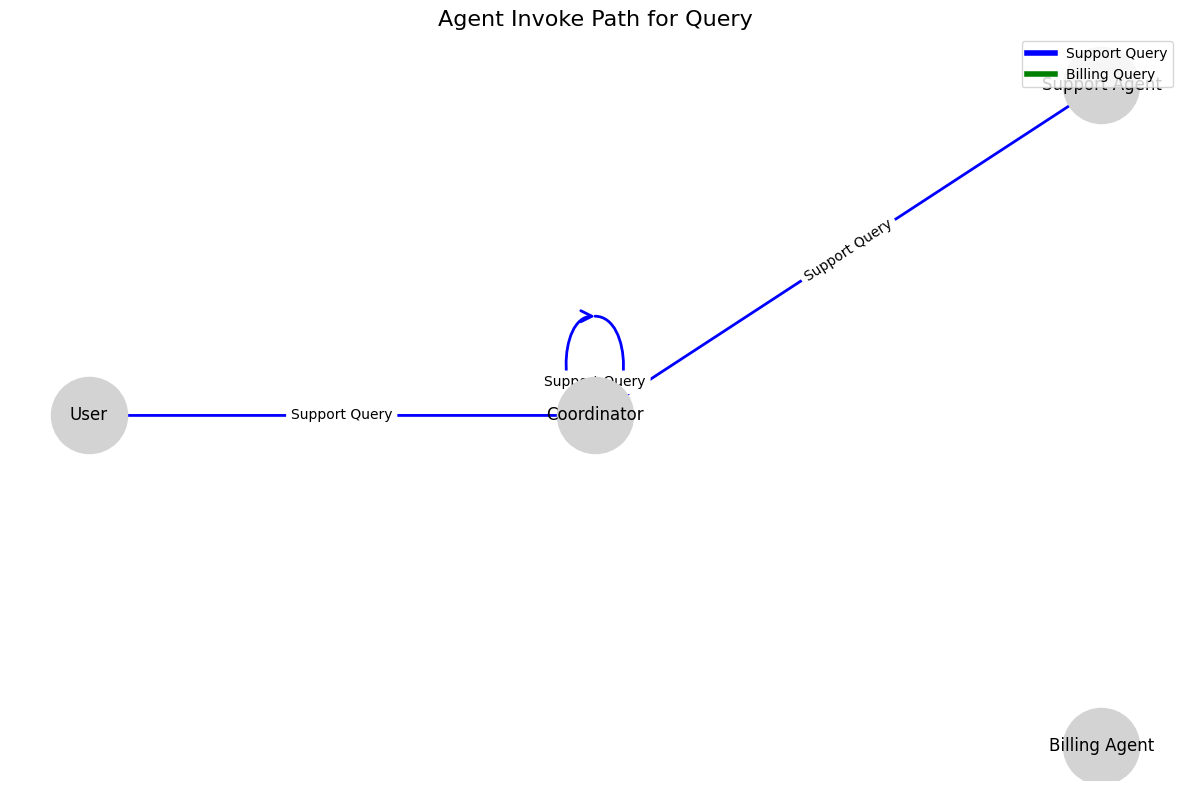

In [11]:
# Test with a technical support query
support_query = "I can't access my email account, it says my password is incorrect, help to give advice"
print(f"Query: {support_query}")

# Run the query and get response and events
support_response, support_events = test_query(support_query)
print(f"Response: {support_response}")

# Extract the agent invoke path
support_path = extract_agent_path(support_events)
print(f"Agent Path: {support_path}")

# Create a dictionary for visualization
support_query_path = {"Support Query": support_path}

# Visualize the agent invoke path
visualize_agent_path(support_query_path)


## Billing Agent Query Example

Now let's test a query that should be routed to the Billing agent and analyze the agent invoke path.

08:42:03 - LiteLLM:INFO: utils.py:2870 - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:42:03,925 - LiteLLM - INFO - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai


Query: I was charged twice for my subscription last month


2025-05-14 08:42:04,642 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:42:04 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
2025-05-14 08:42:04,646 - LiteLLM - INFO - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
08:42:04 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
2025-05-14 08:42:04,650 - LiteLLM - INFO - selected model name for cost calculation: openai/gpt-3.5-turbo-0125
08:42:04 - LiteLLM:INFO: utils.py:2870 - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:42:04,651 - LiteLLM - INFO - 
LiteLLM completion() model= gpt-3.5-turbo-0125; provider = openai
2025-05-14 08:42:05,398 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:42:05 - LiteLLM:INFO: cost_calculator.py:655 - selected model name for cost cal

Response: I can assist you with that. To address the double charge for your subscription last month, we will need to review your account details. Could you please provide me with your account information such as your account number or email associated with the subscription? 
Agent Path: ['HelpDeskCoordinator', 'HelpDeskCoordinator', 'Billing']


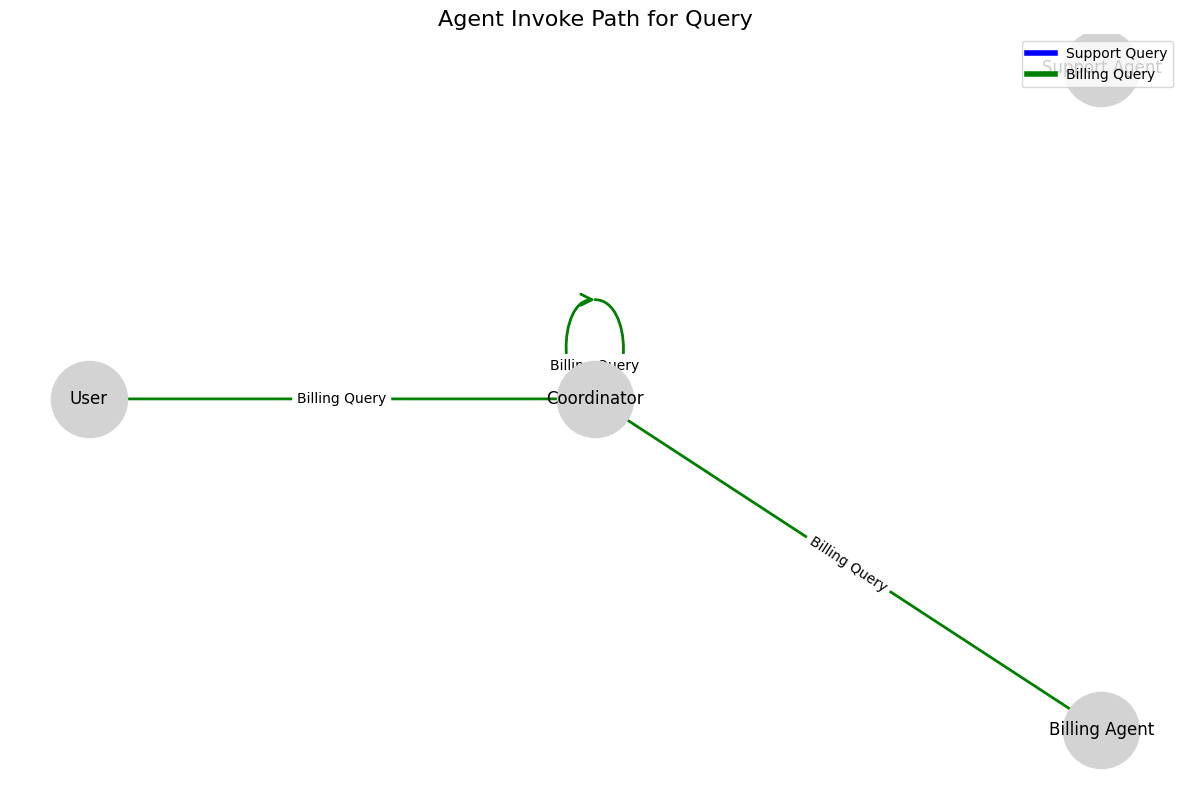

In [12]:
# Test with a billing query
billing_query = "I was charged twice for my subscription last month"
print(f"Query: {billing_query}")

# Run the query and get response and events
billing_response, billing_events = test_query(billing_query)
print(f"Response: {billing_response}")

# Extract the agent invoke path
billing_path = extract_agent_path(billing_events)
print(f"Agent Path: {billing_path}")

# Create a dictionary for visualization
billing_query_path = {"Billing Query": billing_path}

# Visualize the agent invoke path
visualize_agent_path(billing_query_path)


## Comparing Both Agent Paths

Let's compare the invoke paths for both types of queries side by side.

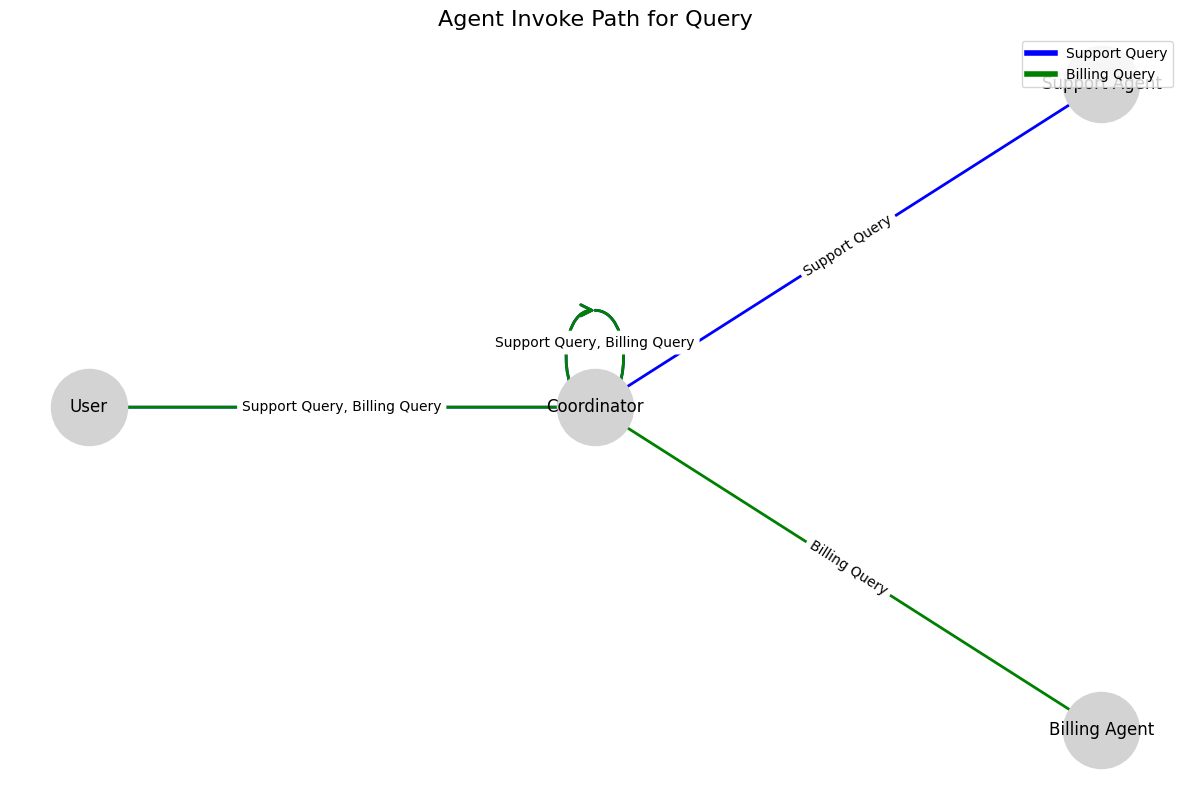

In [13]:
# Create a combined dictionary of query paths
combined_query_paths = {
    "Support Query": support_path,
    "Billing Query": billing_path
}

# Visualize the combined agent invoke paths
visualize_agent_path(combined_query_paths)
